
Google colab preliminar part

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch
import os


transform = transforms.Compose(
    [transforms.Resize((64,64)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

aug_transform = transforms.Compose(
    [transforms.RandomResizedCrop((64,64),scale=(.7,1)),
     transforms.ToTensor(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(20),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.ImageFolder("./drive/MyDrive/ColabNotebooks/train", aug_transform)
testset = torchvision.datasets.ImageFolder("./drive/MyDrive/ColabNotebooks/data", transform)
testfalseset = torchvision.datasets.ImageFolder("./drive/MyDrive/ColabNotebooks/falsetest", transform)
train_loader = DataLoader(trainset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(testset, batch_size = batch_size, shuffle = True)
testfalse_loader = DataLoader(testfalseset, batch_size = batch_size, shuffle = True)

classes = ('Dog', 'Horse', 'Elephant', 'Butterfly',
           'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel')

classes_aug = ('Dog', 'Horse', 'Elephant', 'Butterfly',
           'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel', 'False')

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Local preliminar part

In [1]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch
import os

transform = transforms.Compose(
    [transforms.Resize((64,64)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

aug_transform = transforms.Compose(
    [transforms.RandomResizedCrop((64,64),scale=(.7,1)),
     transforms.ToTensor(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(20),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.ImageFolder("./train", aug_transform)
testset = torchvision.datasets.ImageFolder("./data", transform)
testfalseset = torchvision.datasets.ImageFolder("./falsetest", transform)
train_loader = DataLoader(trainset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(testset, batch_size = batch_size, shuffle = True)
testfalse_loader = DataLoader(testfalseset, batch_size = batch_size, shuffle = True)

classes = ('Dog', 'Horse', 'Elephant', 'Butterfly',
           'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel')

classes_aug = ('Dog', 'Horse', 'Elephant', 'Butterfly',
           'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel', 'False')


In [ ]:
'''
# Random split image
import os
import random
import numpy as np

BASE_PATH = './'
DIR_PATH = os.path.join(BASE_PATH, 'data')
NEW_DIR_PATH = os.path.join(BASE_PATH, 'train')
#print(os.listdir(DIR_PATH))

for directory in os.listdir(DIR_PATH):
    SOURCE_PATH = os.path.join(DIR_PATH, directory)
    TARGET_PATH = os.path.join(NEW_DIR_PATH, directory)
    for image in os.listdir(SOURCE_PATH):
        if np.random.uniform() < 0.8:
            os.rename(os.path.join(SOURCE_PATH, image), os.path.join(TARGET_PATH, image))
'''


"\nimport os\nimport random\nimport numpy as np\n\nBASE_PATH = './'\nDIR_PATH = os.path.join(BASE_PATH, 'data')\nNEW_DIR_PATH = os.path.join(BASE_PATH, 'train')\n#print(os.listdir(DIR_PATH))\n\nfor directory in os.listdir(DIR_PATH):\n    SOURCE_PATH = os.path.join(DIR_PATH, directory)\n    TARGET_PATH = os.path.join(NEW_DIR_PATH, directory)\n    for image in os.listdir(SOURCE_PATH):\n        if np.random.uniform() < 0.8:\n            os.rename(os.path.join(SOURCE_PATH, image), os.path.join(TARGET_PATH, image))\n"

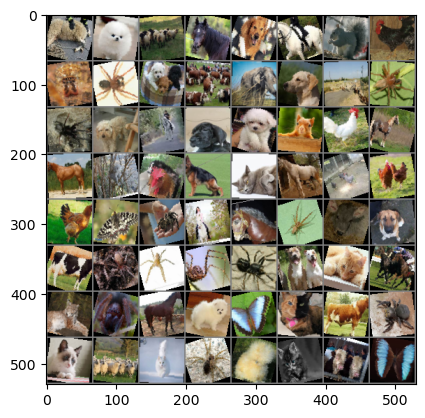

Sheep Dog   Sheep Horse Dog   Horse Squirrel Chicken Spider Spider Dog   Cow   Elephant Dog   Sheep Spider Spider Dog   Horse Dog   Dog   Squirrel Chicken Horse Horse Squirrel Chicken Dog   Cat   Horse Chicken Chicken Chicken Butterfly Spider Horse Horse Spider Cow   Dog   Cow   Spider Spider Spider Spider Dog   Cat   Horse Cat   Spider Horse Dog   Butterfly Cat   Cow   Spider Cat   Sheep Cat   Spider Chicken Cat   Cow   Butterfly


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Test showing an image


def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
# Simil Res-Net

import torch.nn as nn
import torch

kernel_size = 3

class ResBlock(nn.Module):
    def __init__(self, in_chan, out_chan, kernel_size = kernel_size):
        super(ResBlock, self).__init__()

        self.leftpath = nn.Sequential(
            nn.Conv2d(in_chan, out_chan, kernel_size= kernel_size, padding= 'same'),
            nn.BatchNorm2d(out_chan),
            nn.Conv2d(out_chan, out_chan, kernel_size= kernel_size, padding= 'same'),
            nn.LeakyReLU(.2),
            nn.Dropout2d(.1)
        )

        self.rightpath = nn.Identity()

        self.final_block = nn.Sequential(
            nn.Conv2d(out_chan+in_chan, out_chan, kernel_size= kernel_size, padding= 'same'),
            nn.LeakyReLU(.2),
            nn.MaxPool2d(2,2)
        )

    def forward(self, image):
        left = self.leftpath(image)
        right = self.rightpath(image)
        out = torch.cat([left, right], dim=1)
        out = self.final_block(out)
        return out

In [4]:
in_chan = 3
hidden_chan = 512
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class FakeResNet(nn.Module):
    def __init__(self, in_chan = in_chan, hidden_chan = hidden_chan):
        super(FakeResNet,self).__init__()

        self.block1 = ResBlock(in_chan, hidden_chan//4) #32
        self.block2 = ResBlock(hidden_chan//4, hidden_chan//2) #16
        self.block3 = ResBlock(hidden_chan//2, hidden_chan) #8
        self.block4 = ResBlock(hidden_chan, hidden_chan) #4
        self.block5 = nn.Sequential(
            nn.Conv2d(hidden_chan,hidden_chan,4),
            nn.LeakyReLU(0.2)
        )

        self.block6 = nn.Sequential(
            nn.Linear(hidden_chan, hidden_chan*2),
            nn.LeakyReLU(.2),
            nn.Dropout(.3),
            nn.Linear(hidden_chan*2, 10),
            nn.Softmax(dim = 1)
        )

    def forward(self, image):
        #print("0 ",image.shape)
        out = self.block1(image)
        #print("1", out.shape)
        out = self.block2(out)
        #print("2", out.shape)
        out = self.block3(out)
        #print("3", out.shape)
        out = self.block4(out)
        #print("4", out.shape)
        out = self.block5(out)
        #print("5", out.shape)
        out = torch.squeeze(out, dim = 2)
        #print("sq 1", out.shape)
        out = torch.squeeze(out, dim = 2)
        #print("sq 2", out.shape)
        out = self.block6(out)
        #print("6", out.shape)
        return out


fake_res = FakeResNet(in_chan, hidden_chan).to(device)

Google colab load net

In [ ]:
fake_res.load_state_dict(torch.load("./drive/MyDrive/ColabNotebooks/fake_res2.2.pth"))

Local load net

In [5]:
fake_res.load_state_dict(torch.load("./fake_res2.2.pth"))

<All keys matched successfully>

In [ ]:
import torch.optim as optim
from tqdm.notebook import trange, tqdm
from torch.optim.lr_scheduler import LambdaLR

#classes = ('Dog', 'Horse', 'Elephant', 'Butterfly',
#           'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel')

num_epochs = 0
learning_rate = 0.00001
#          'Dog', 'Horse', 'Elephant', 'Butterfly','Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel'
weights = [1.0, 1.8539839878002287, 3.363070539419087, 2.3025568181818183, 1.5697224015493867, 2.9154676258992804, 2.6061093247588425, 2.671978021978022, 1.0087118855009334, 2.611707841031149]
weights = torch.FloatTensor(weights).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)
criterion2 = nn.CrossEntropyLoss()
optimizer = optim.SGD(fake_res.parameters(), lr = learning_rate, momentum = 0.9)

fake_res.train()

i = 0

for epoch in trange(num_epochs):  # loop over the dataset multiple times


    for inputs, labels in tqdm(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        #print(data, labels)
        # Forward + backward + optimize
        outputs = fake_res(inputs)
        if epoch%13 < 9:
            loss = criterion(outputs, labels)
        else:
            loss = criterion2(outputs, labels)
        loss.backward()
        optimizer.step()


        # Printf images and guess, print loss
        if i % 600 == 0:
            indeces = torch.randint(0, len(outputs), size = (4,))
            images_to_print = inputs[indeces]
            labels_to_print = labels[indeces]
            output_to_print = outputs[indeces]
            output_to_print = torch.argmax(output_to_print, dim = 1)
            # Print images
            imshow(torchvision.utils.make_grid(images_to_print.cpu()))
            print('GroundTruth: ', ' '.join(f'{classes[labels_to_print[j]]:5s}' for j in range(4)))
            print('Prevision: ', ' '.join(f'{classes[output_to_print[j]]:5s}' for j in range(4)))
            print(f'[{epoch + 1}, {(i + 1)%328:5d}] loss: {loss.item():.3f}')
            running_loss = 0.0

        i += 1

print('Finished Training')


In [ ]:
# Train global accuracy
correct = 0
total = 0

fake_res.eval()
with torch.no_grad(): # Don't calculate grad
    for data in train_loader:
        X, y = data
        output = fake_res(X.to(device))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.942


In [6]:
def getID(tensor):
    _, predictions = torch.max(tensor, 1)
    return predictions

In [9]:
# Accuracy for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

fake_res.eval()

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = fake_res(images.to(device))
        predictions = getID(outputs)
        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Dog   is 93.2 %
Accuracy for class: Horse is 94.7 %
Accuracy for class: Elephant is 97.1 %
Accuracy for class: Butterfly is 92.8 %
Accuracy for class: Chicken is 93.2 %
Accuracy for class: Cat   is 89.9 %
Accuracy for class: Cow   is 92.5 %
Accuracy for class: Sheep is 93.5 %
Accuracy for class: Spider is 97.5 %
Accuracy for class: Squirrel is 94.0 %


In [7]:
def getIDV2(tensor, tr):
    values, predictions = torch.max(tensor, 1)
    i = 0
    for value in values:
      if value < tr:
        predictions[i] = 10
      i += 1
    return predictions

In [9]:
# Accuracy for each class with fake images
correct_pred = {classname: 0 for classname in classes_aug}
total_pred = {classname: 0 for classname in classes_aug}

fake_res.eval()
tr = 0.999

with torch.no_grad():
    for data in testfalse_loader:
        images, labels = data
        outputs = fake_res(images.to(device))
        predictions = getIDV2(outputs, tr)
        # Collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            #print(label, prediction)
            if label == prediction:
                correct_pred[classes_aug[label]] += 1
            total_pred[classes_aug[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Dog   is 92.0 %
Accuracy for class: Horse is 87.0 %
Accuracy for class: Elephant is 92.0 %
Accuracy for class: Butterfly is 78.0 %
Accuracy for class: Chicken is 93.0 %
Accuracy for class: Cat   is 81.0 %
Accuracy for class: Cow   is 86.0 %
Accuracy for class: Sheep is 79.0 %
Accuracy for class: Spider is 83.0 %
Accuracy for class: Squirrel is 82.0 %
Accuracy for class: False is 62.5 %


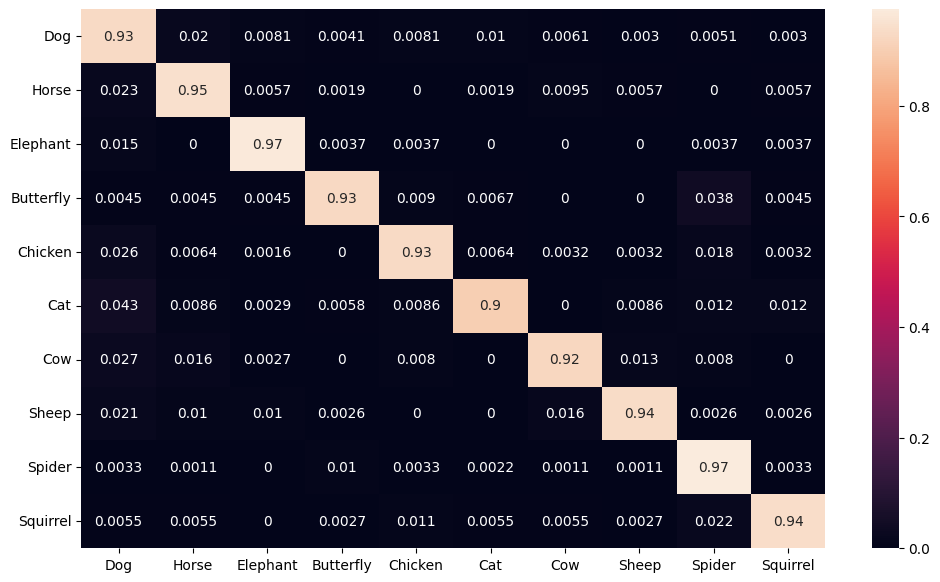

In [ ]:
# Conf matrix 1
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
        output = fake_res(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# Build matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
#plt.savefig('CMatrix.png')

In [10]:
def getIDV3(tensor, tr):
    __, predictions = torch.max(tensor, 1)
    values = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    i = 0
    for value in values:
      if value < tr:
        predictions[i] = 10
      i += 1
    return predictions

Saliency

In [37]:
def prep_output(img_tensor):
    img_tensor = (img_tensor + 1)/2
    img_tensor = img_tensor[0]
    #print(img_tensor.shape())
    out = img_tensor.detach().cpu().numpy().transpose(1, 2, 0)
    return out

Random image

In [49]:
#Selecting an image random
fake_res.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
input_img = images[0].to(device)
img = input_img
#input_img = torch.unsqueeze(input_img, 0)
input_img.unsqueeze_(0)
input_img.shape

torch.Size([1, 3, 64, 64])

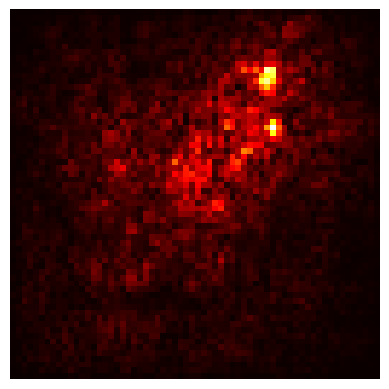

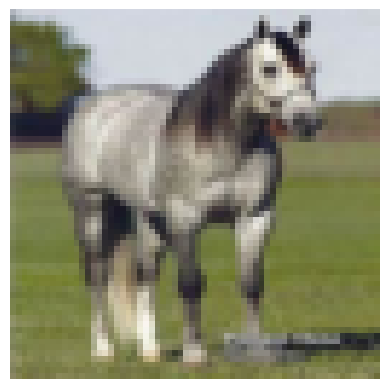

In [111]:
#Selecting an image random
fake_res.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
input_img = images[0].to(device)
img = input_img
#input_img = torch.unsqueeze(input_img, 0)
input_img.unsqueeze_(0)
input_img.shape

# Find the gradientof input image
input_img.requires_grad_()

scores = fake_res(input_img)

# Get the index corresponding to the maximum score and the maximum score itself.
score_max_index = scores.argmax()
score_max = scores[0,score_max_index]

score_max.backward()

saliency, _ = torch.max(input_img.grad.data.abs(),dim=1)

# Plot the saliency map as a heatmap
plt.imshow(saliency[0].cpu(), cmap=plt.cm.hot)
plt.axis('off')
plt.show()
plt.imshow(prep_output(img))
plt.axis('off')
plt.show()

In [ ]:
# Save model
PATH = './fake_res2.2.pth'
torch.save(fake_res.state_dict(), PATH)

Calculate the weights

In [ ]:
def get_dict_weights(dataset):
    dataset_size = len(dataset)
    print(dataset_size)
    img_dict = {}
    for i in range(10):
        img_dict[classes[i]] = 0

    for i in range(dataset_size):
        img, label = dataset[i]
        img_dict[classes[label]] += 1
        if i % 1000 == 0:
            print(i)

    return img_dict

def get_weights(dict_weights):
    weights = []
    for i in range(10):
        weights.append(dict_weights[classes[i]])
    max_n = max(weights)

    for i in range(len(weights)):
        weights[i] = max_n/weights[i]
    return weights

In [ ]:
dict_weights = get_dict_weights(trainset)

In [ ]:
print(dict_weights)

{'Dog': 4863, 'Horse': 2623, 'Elephant': 1446, 'Butterfly': 2112, 'Chicken': 3098, 'Cat': 1668, 'Cow': 1866, 'Sheep': 1820, 'Spider': 4821, 'Squirrel': 1862}


In [ ]:
weights = get_weights(dict_weights)
print(f"{weights}")

[1.0, 1.8539839878002287, 3.363070539419087, 2.3025568181818183, 1.5697224015493867, 2.9154676258992804, 2.6061093247588425, 2.671978021978022, 1.0087118855009334, 2.611707841031149]
